In [1]:
import pandas as pd 
pd.set_option('display.max_columns', 500)
import numpy as np
import seaborn as sns

Required libraries

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

Setting plot size

In [3]:
cars_data=pd.read_csv("D:\\notebooks\cars_sampled.csv" )
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Reading CSV file

In [4]:
cars=cars_data.copy()

Creating copy of dataset

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

Structure of the dataset

In [6]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


Summarizing data<br>
Lambda function displays all floats upto 3rd decimal point<br>
pd.set_option to display maximum set of columns

============================================================================= <br>
**Data cleaning**<br>=============================================================================

In [6]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

Dropping unwanted columns

In [7]:
cars.drop_duplicates(keep='first',inplace=True)

Removing duplicate records


In [9]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

No. of missing values in each column

<Axes: xlabel='yearOfRegistration', ylabel='price'>

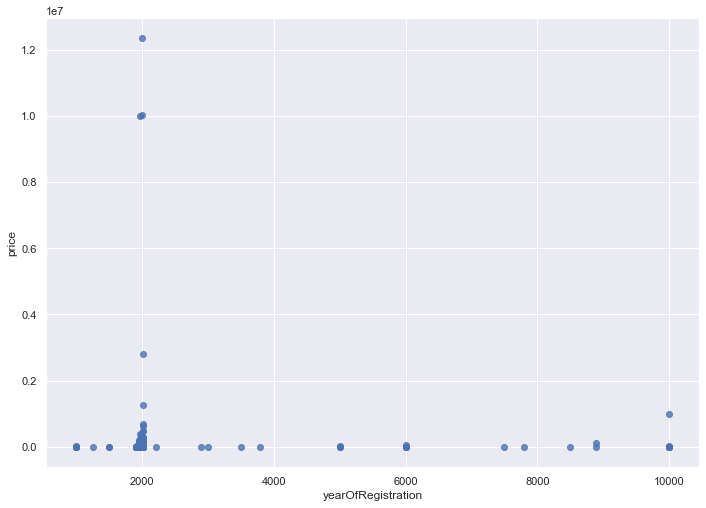

In [10]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration'] > 2018)
sum(cars['yearOfRegistration'] < 1950)
sns.regplot(x='yearOfRegistration', y='price', scatter=True, 
            fit_reg=False, data=cars)

Variable yearOfRegistration<br>
Working range- 1950 and 2018

<Axes: xlabel='price', ylabel='Count'>

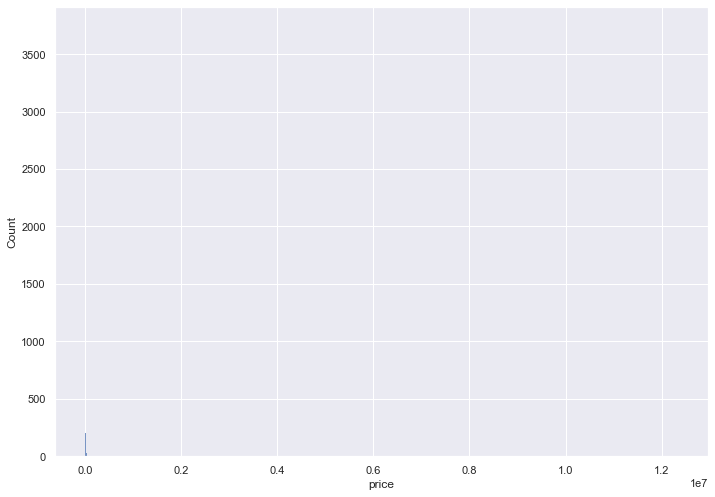

In [14]:
price_count=cars['price'].value_counts().sort_index()
sns.histplot(cars['price'])

In [15]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

<Axes: ylabel='price'>

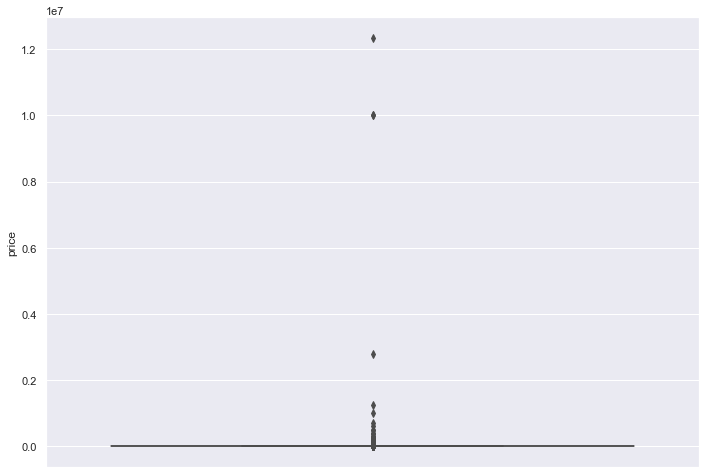

In [16]:
sns.boxplot(y=cars['price'])

In [18]:
print(sum(cars['price'] > 150000))
print(sum(cars['price'] < 100))

34
1748


 Variable price <br>
 Working range- 100 and 150000

<Axes: xlabel='powerPS', ylabel='Count'>

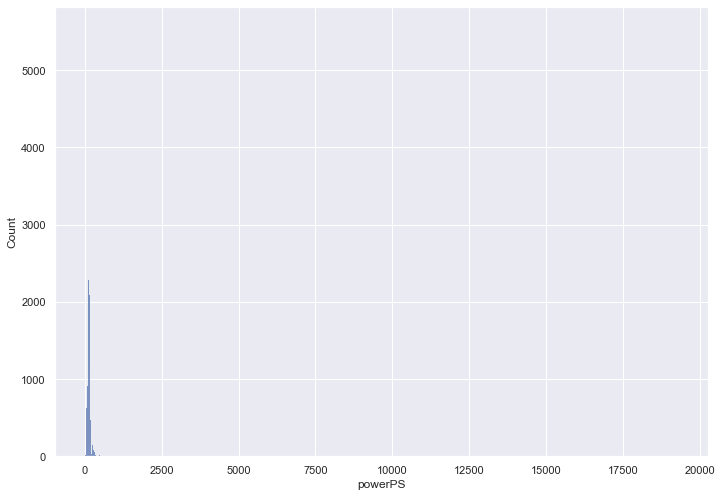

In [19]:
power_count=cars['powerPS'].value_counts().sort_index()
sns.histplot(cars['powerPS'])

<Axes: ylabel='powerPS'>

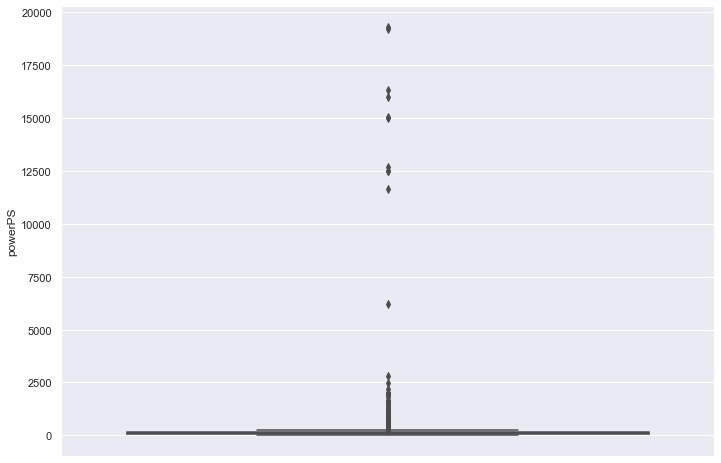

In [20]:
cars['powerPS'].describe()
sns.boxplot(y=cars['powerPS'])

<Axes: xlabel='powerPS', ylabel='price'>

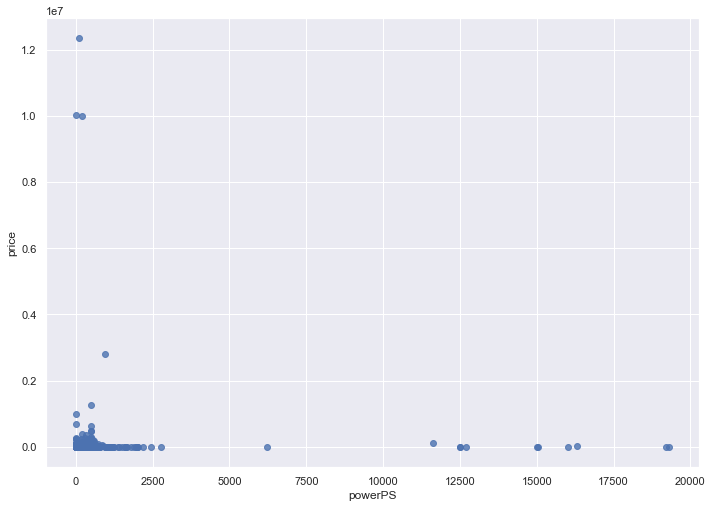

In [21]:
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)

In [23]:
print(sum(cars['powerPS'] > 500))
print(sum(cars['powerPS'] < 10))

115
5565


Variable powerPS<br>
Working range- 10 and 500

In [24]:
cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]

Setting the working range of data

In [25]:
cars['monthOfRegistration']/=12
cars['Age']=(2023-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)

cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

Further to simplify- variable reduction, we combine yearOfRegistration and monthOfRegistration into a consolidated Age by dividing month by 12 and adding the decimal to the difference of current year and year of registration. <br> <br>
We drop the redundant yearOfRegistration and monthOfRegistration

**Visualisation**

<Axes: xlabel='Age', ylabel='price'>

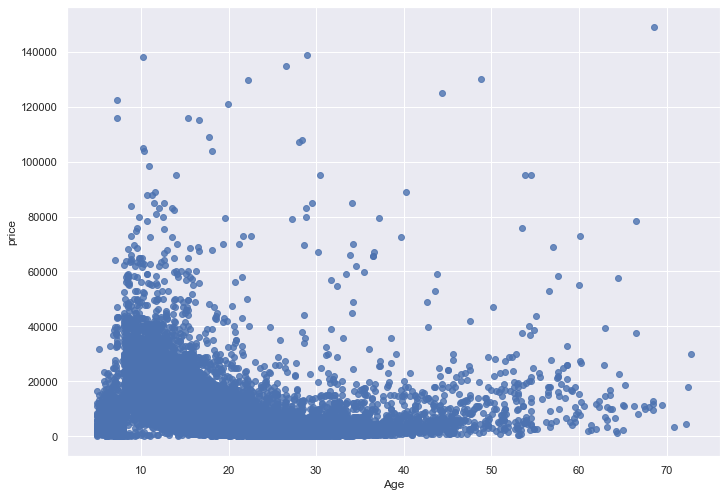

In [34]:
sns.regplot(x='Age', y='price', scatter=True, 
            fit_reg=False, data=cars)

Age vs price<br>
Cars priced higher are newer<br>
With increase in age, price decreases,
however some cars are priced higher with increase in age

<Axes: xlabel='powerPS', ylabel='price'>

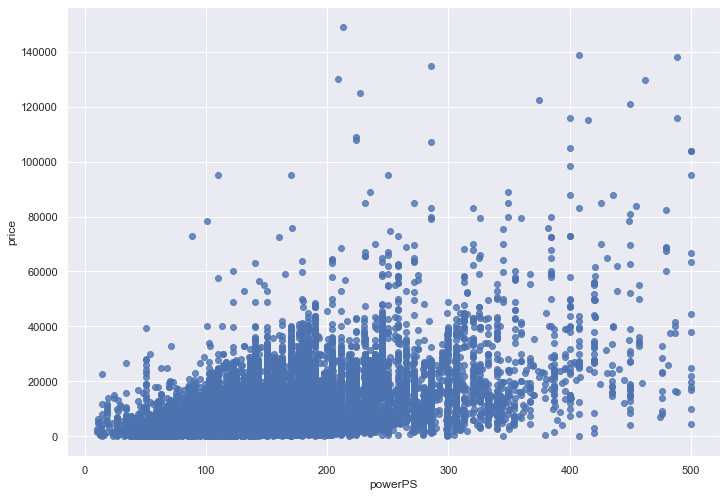

In [35]:
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)

 powerPS vs price

In [8]:
cars['offerType'].value_counts()


offer      49528
request        3
Name: offerType, dtype: int64

<Axes: xlabel='offerType', ylabel='count'>

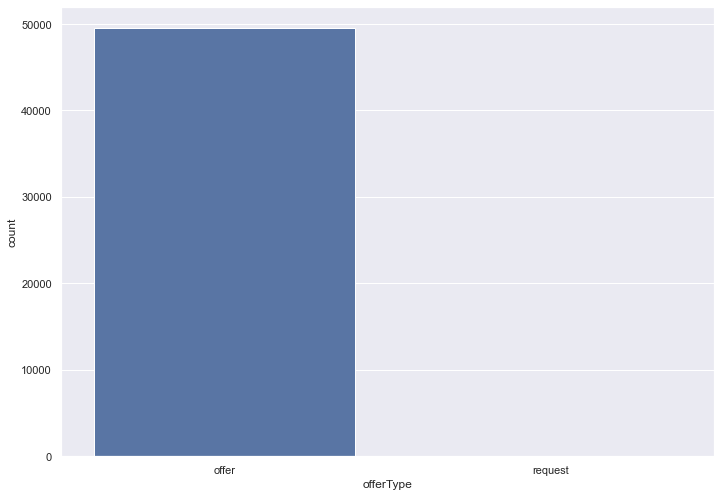

In [9]:
sns.countplot(x= 'offerType',data=cars)

All cars have 'offer'=> Insignificant

In [53]:
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [54]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


<Axes: xlabel='abtest', ylabel='price'>

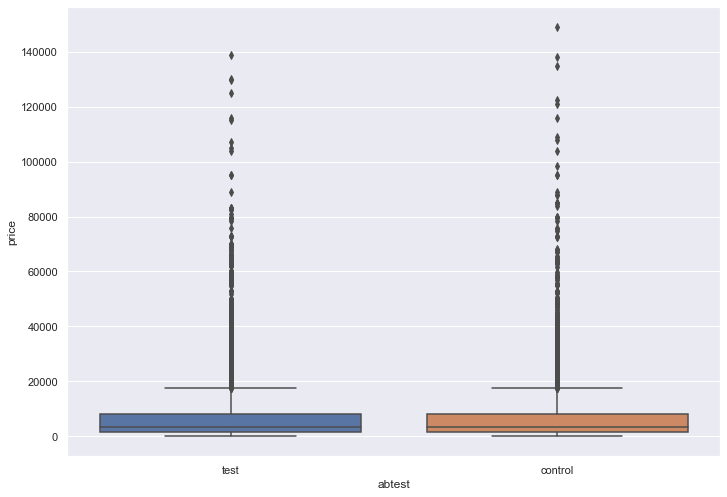

In [42]:
sns.boxplot(x= 'abtest',y='price',data=cars)

<Axes: xlabel='abtest', ylabel='count'>

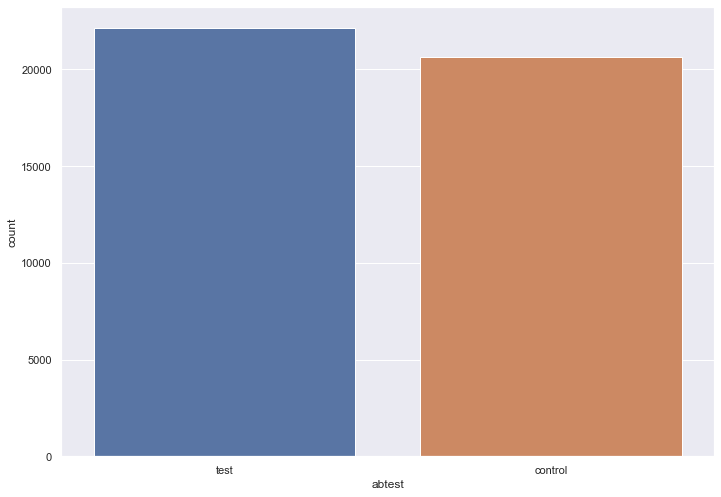

In [50]:
sns.countplot(x= 'abtest',data=cars)

Variable abtest<br>
For every price value there is almost 50-50 distribution<br>
Does not affect price => Insignificant

In [43]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

<Axes: xlabel='vehicleType', ylabel='price'>

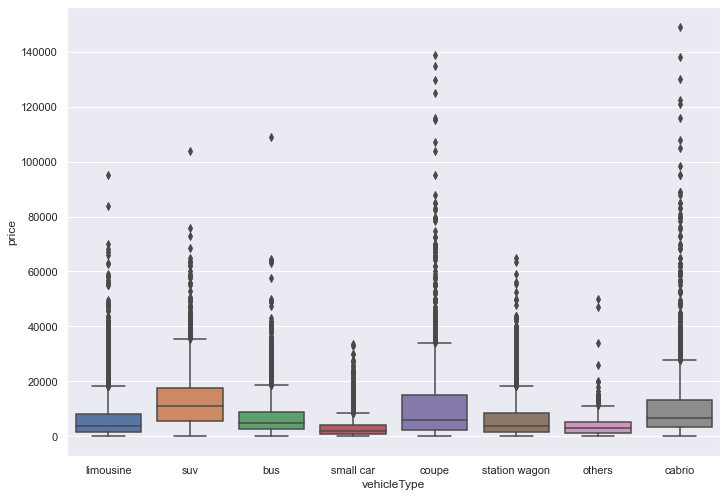

In [49]:
sns.boxplot(x= 'vehicleType',y='price',data=cars)

<Axes: xlabel='vehicleType', ylabel='count'>

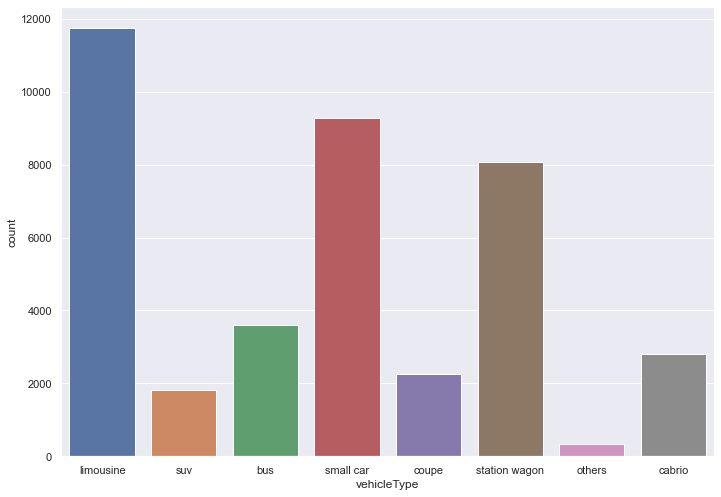

In [52]:
sns.countplot(x= 'vehicleType',data=cars)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


Variable vehicleType<br>8 types- limousine, small cars and station wagons max freq<br>
vehicleType affects price

In [55]:
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [56]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


<Axes: xlabel='gearbox', ylabel='count'>

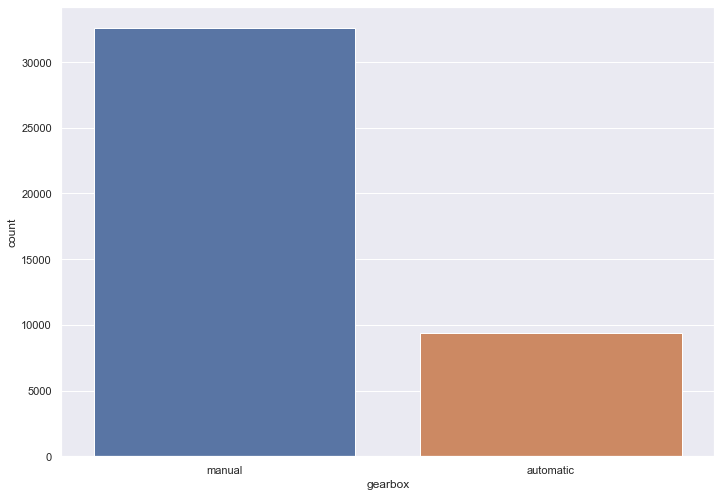

In [57]:
sns.countplot(x= 'gearbox',data=cars)

<Axes: xlabel='gearbox', ylabel='price'>

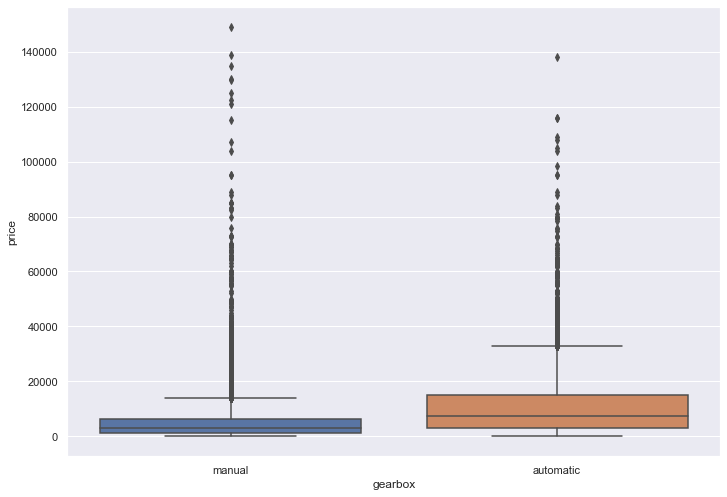

In [59]:
sns.boxplot(x= 'gearbox',y='price',data=cars)

Variable gearbox<br> gearbox affects price 

In [62]:
cars['model'].value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: model, Length: 247, dtype: int64

In [63]:
pd.crosstab(cars['model'],columns='count',normalize=True)

col_0,count
model,
100,0.001
145,0.000
147,0.001
156,0.002
159,0.000
...,...
yaris,0.003
yeti,0.001
ypsilon,0.001


<Axes: xlabel='model', ylabel='count'>

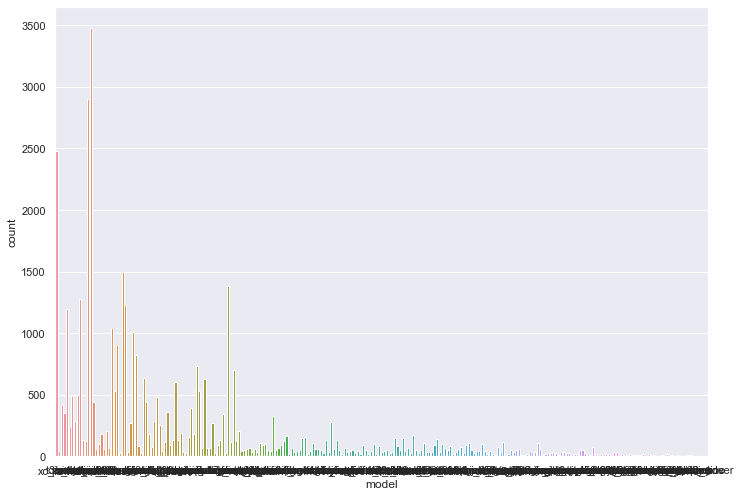

In [64]:
sns.countplot(x= 'model',data=cars)

<Axes: xlabel='model', ylabel='price'>

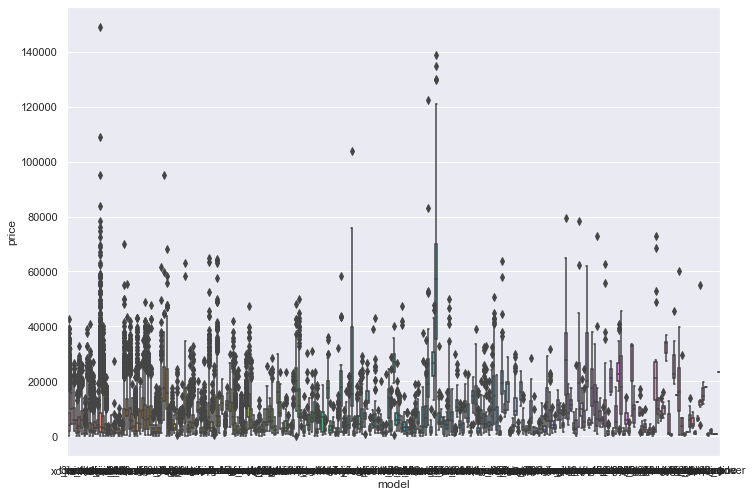

In [65]:
sns.boxplot(x= 'model',y='price',data=cars)

Variable model <br>
Cars are distributed over many models<br>
Considered in modelling

In [66]:
cars['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [67]:
pd.crosstab(cars['kilometer'],columns='count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


<Axes: xlabel='kilometer', ylabel='price'>

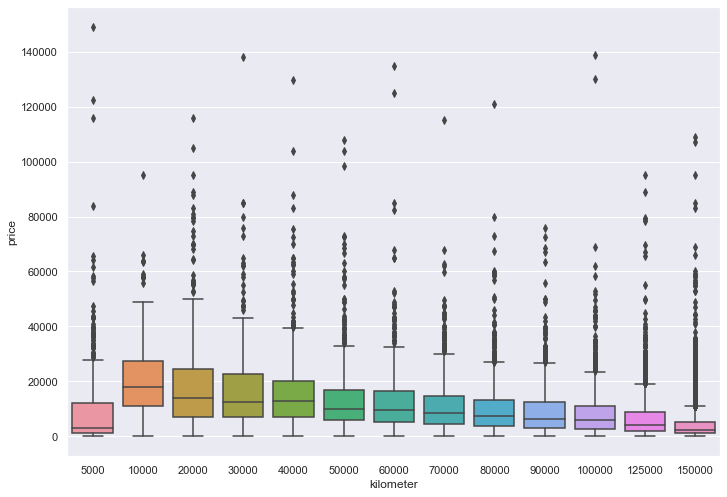

In [68]:
sns.boxplot(x= 'kilometer',y='price',data=cars)

In [69]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

<Axes: xlabel='kilometer', ylabel='Count'>

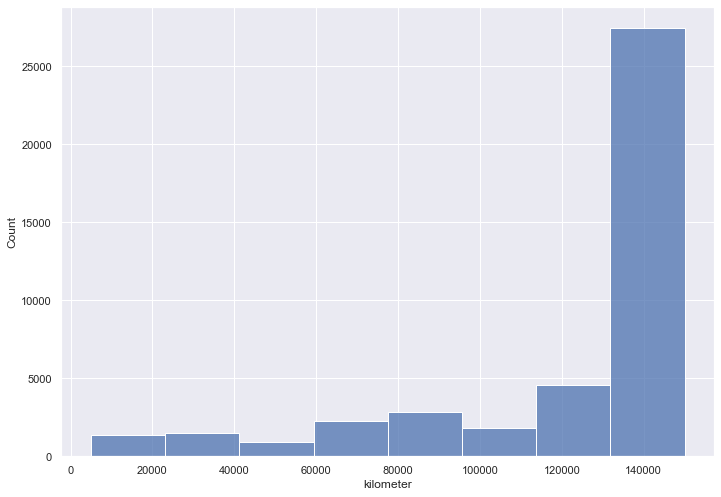

In [71]:
sns.histplot(cars['kilometer'],bins=8 ,kde=False)

<Axes: xlabel='kilometer', ylabel='price'>

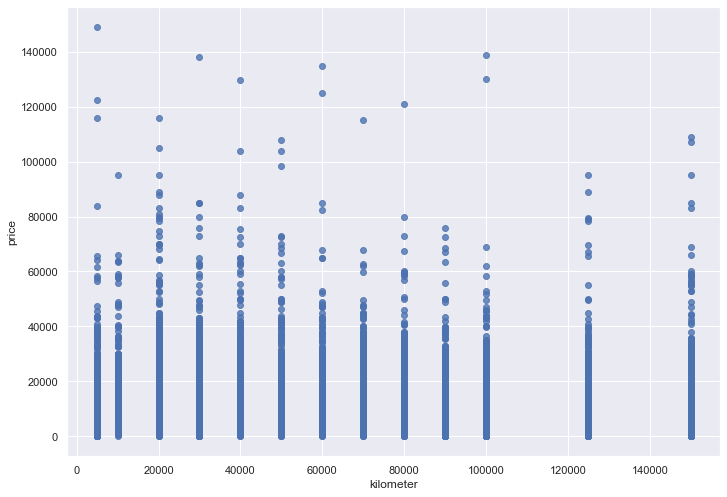

In [72]:
sns.regplot(x='kilometer', y='price', scatter=True, 
            fit_reg=False, data=cars)

 Variable kilometer<br>
 Considered in modelling

In [74]:
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [75]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


<Axes: xlabel='fuelType', ylabel='count'>

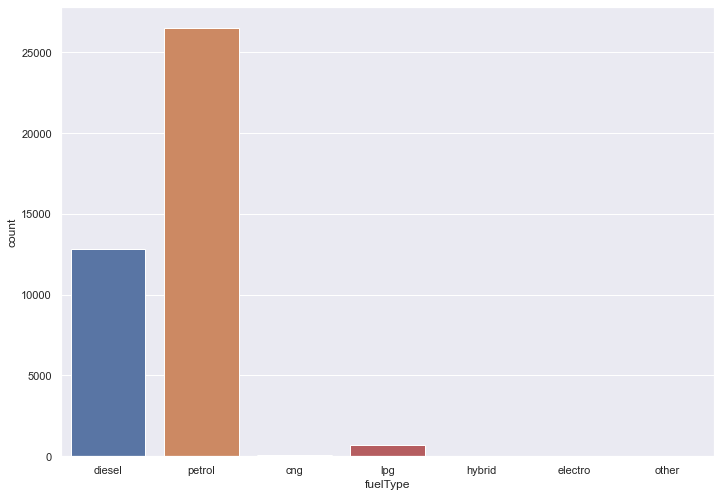

In [76]:
sns.countplot(x= 'fuelType',data=cars)

<Axes: xlabel='fuelType', ylabel='price'>

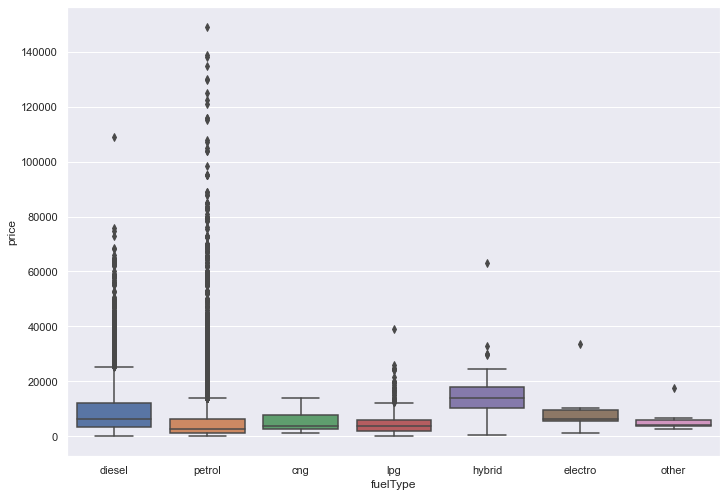

In [77]:
sns.boxplot(x= 'fuelType',y='price',data=cars)

 Variable fuelType <br>
 fuelType affects price

In [10]:
cars['brand'].value_counts()

volkswagen        10517
bmw                5446
opel               5336
mercedes_benz      4712
audi               4413
ford               3318
renault            2439
peugeot            1503
fiat               1230
seat               1005
mazda               765
skoda               762
nissan              728
smart               715
citroen             696
toyota              599
sonstige_autos      532
volvo               473
hyundai             464
mini                445
mitsubishi          416
honda               347
kia                 322
porsche             311
suzuki              301
alfa_romeo          280
chevrolet           243
chrysler            186
dacia               133
subaru              130
jeep                105
land_rover           92
daihatsu             86
jaguar               86
trabant              84
saab                 74
daewoo               73
lancia               68
rover                63
lada                 33
Name: brand, dtype: int64

In [11]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.089
bmw,0.110
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


<Axes: xlabel='brand', ylabel='count'>

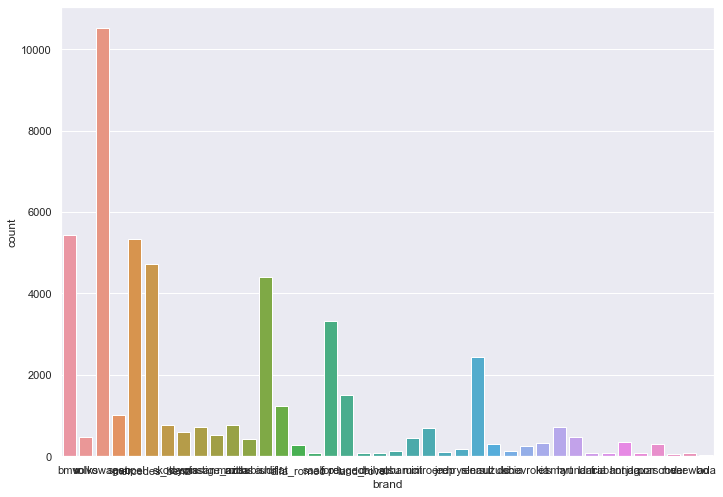

In [12]:
sns.countplot(x= 'brand',data=cars)

<Axes: xlabel='brand', ylabel='price'>

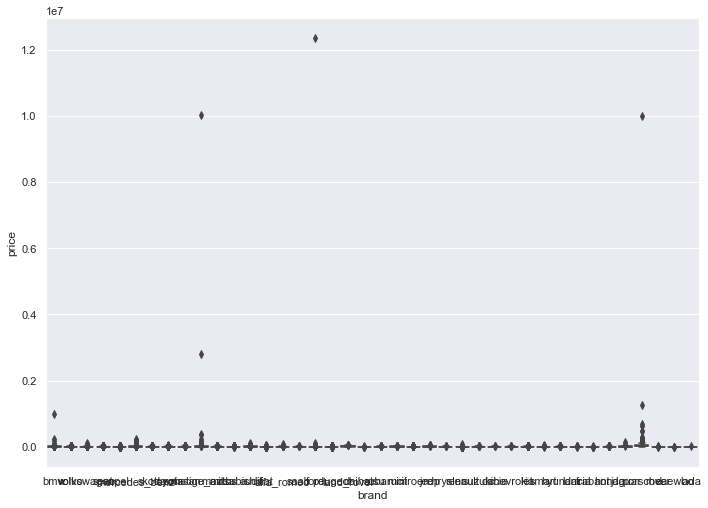

In [13]:
sns.boxplot(x= 'brand',y='price',data=cars)

Variable brand<br>Cars are distributed over many brands <br>
Considered for modelling

In [14]:
cars['notRepairedDamage'].value_counts()

no     34976
yes     4915
Name: notRepairedDamage, dtype: int64

In [15]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.877
yes,0.123


<Axes: xlabel='notRepairedDamage', ylabel='count'>

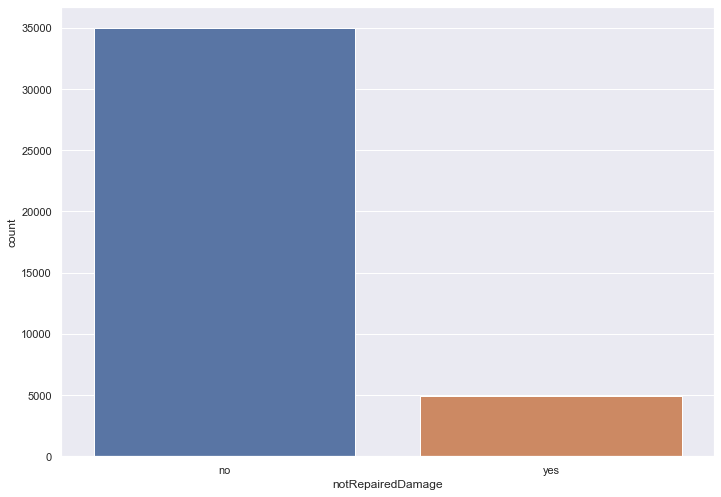

In [16]:
sns.countplot(x= 'notRepairedDamage',data=cars)

<Axes: xlabel='notRepairedDamage', ylabel='price'>

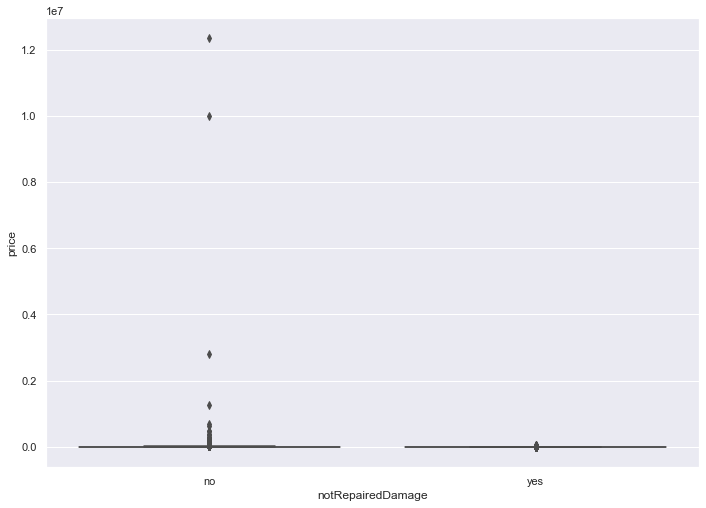

In [17]:
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)

Variable notRepairedDamage<br>
yes- car is damaged but not rectified<BR>
no- car was damaged but has been rectified<br>
As expected, the cars that require the damages to be repaired<br>
fall under lower price ranges

In [18]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()

Removing insignificant variables

In [19]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)   
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]  

kilometer             0.045
powerPS               0.020
yearOfRegistration    0.018
monthOfRegistration   0.000
Name: price, dtype: float64

Correlation